In [19]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/updated_dataset.csv')
data.head(20)

,ID,duration_seconds,goal,launched,state
0,1000002330,5095412,1000,1439295148,0
1,1000004038,3888000,45000,1357950050,0
2,1000007540,2595600,5000,1331954651,0
3,1000014025,3024000,50000,1456493907,1
4,1000023410,1728000,1000,1417458644,1
5,1000030581,3884400,25000,1454357112,0
6,100004721,2592000,2500,1378750777,0
7,100005484,2592000,12500,1362811378,1
8,1000055792,2592000,5000,1409677910,0
9,1000056157,3884400,85000,1455058872,0


In [20]:
data.describe()

,ID,duration_seconds,goal,launched,state
count,2.813020e+05,2.813020e+05,281302.000000,2.813020e+05,281302.000000
mean,1.074933e+09,2.951408e+06,13913.793126,1.394542e+09,0.401991
std,6.194495e+08,1.113778e+06,20783.641331,5.293974e+07,0.490301
min,5.971000e+03,8.640000e+04,0.000000,1.240348e+09,0.000000
25%,5.372773e+08,2.592000e+06,2000.000000,1.353723e+09,0.000000
50%,1.075861e+09,2.592000e+06,5000.000000,1.405118e+09,0.000000
75%,1.611407e+09,3.191708e+06,15000.000000,1.436204e+09,1.000000
max,2.147476e+09,7.948800e+06,85000.000000,1.480637e+09,1.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281302 entries, 0 to 281301
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   ID                281302 non-null  int64
 1   duration_seconds  281302 non-null  int64
 2   goal              281302 non-null  int64
 3   launched          281302 non-null  int64
 4   state             281302 non-null  int64
dtypes: int64(5)
memory usage: 10.7 MB


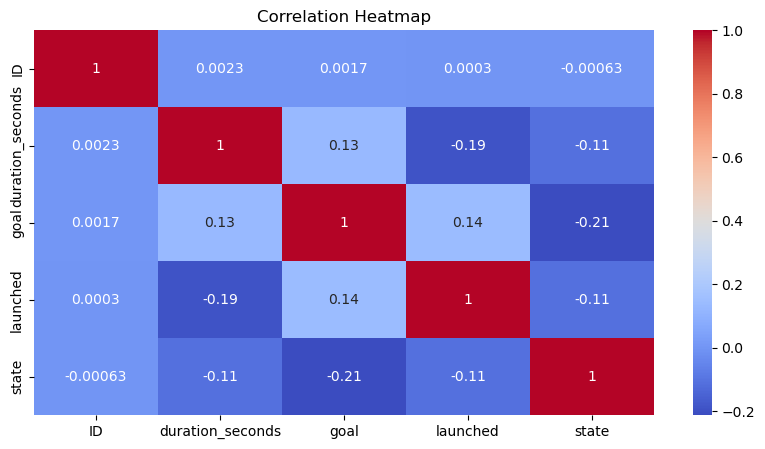

In [22]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

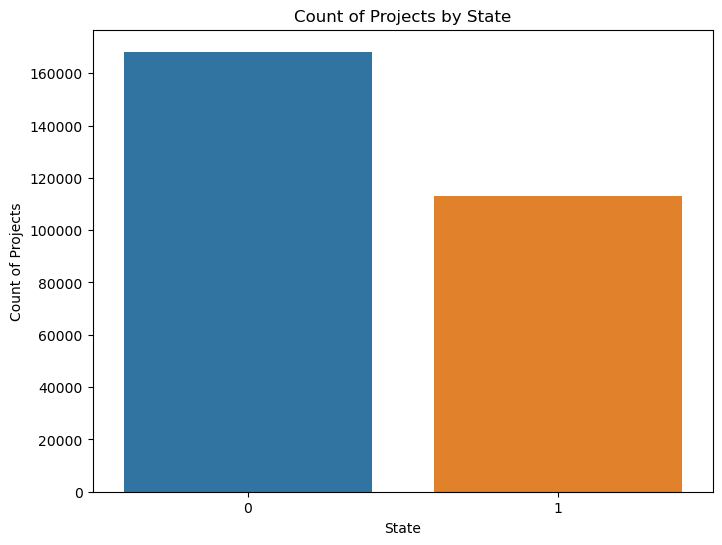

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='state', data=data)
plt.title('Count of Projects by State')
plt.xlabel('State')
plt.ylabel('Count of Projects')
plt.show()

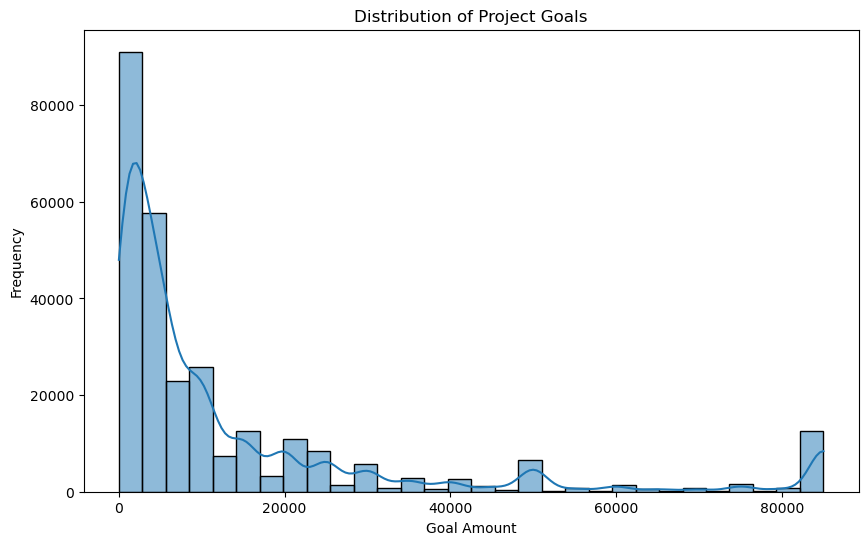

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data['goal'], bins=30, kde=True)
plt.title('Distribution of Project Goals')
plt.xlabel('Goal Amount')
plt.ylabel('Frequency')
plt.show()

In [29]:
X = data.drop('state', axis=1).to_numpy()
X

array([[1000002330,    5095412,       1000, 1439295148],
       [1000004038,    3888000,      45000, 1357950050],
       [1000007540,    2595600,       5000, 1331954651],
       ...,
       [ 999986353,    3925110,      15000, 1278013230],
       [ 999987933,    2619967,      15000, 1452708833],
       [ 999988282,    2419200,       2000, 1311066467]])

In [30]:
y = data.loc[:, 'state'].to_numpy()
y

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [40]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # train model
    classifier.fit(feature_vector_train, label)
    
    # generate labels for validation set
    predictions = classifier.predict(feature_vector_valid)
    
    # evealuate model based on test set labels
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [41]:
# MODEL 1 - logistic regression
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.9906420279554607, 0.6009305333500997, 0.7480740202381618, 0.5995272035690798]


In [42]:
# MODEL 2 - Support Vector Machine
#accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
#accuracy_compare['SVM'] = accuracy
#print ("SVM" , accuracy)

In [43]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.7351338545368397, 0.6724819851546838, 0.7024136272318271, 0.6261353335347755]


<Axes: >

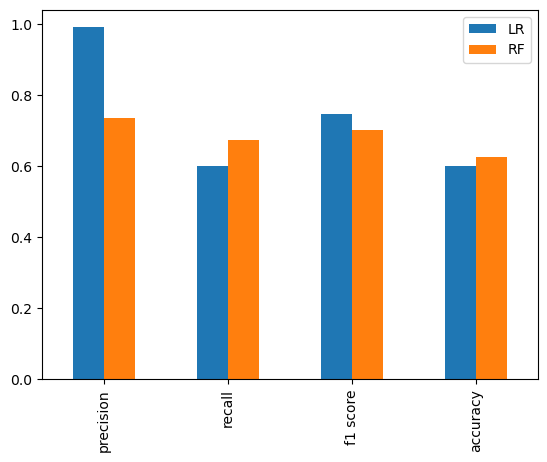

In [44]:
# compare models

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

In [45]:
# corrections and adjustments - use artificial neural network

# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [1.0, 0.6002026270418229, 0.7501582823312488, 0.6002026270418229]


/Users/kacper/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

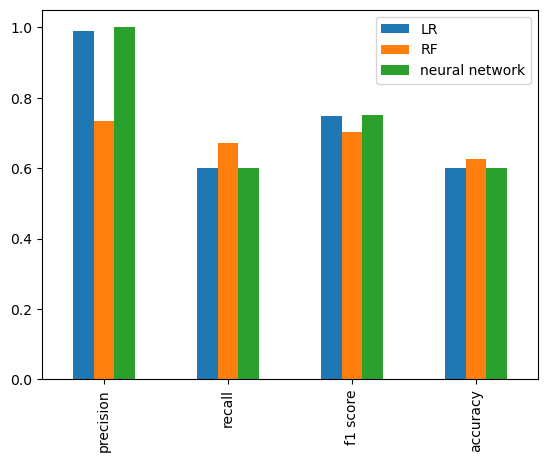

In [46]:
df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')